TASK 3 

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.






https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars

### Problem statement

predict the selling price of used cars.

In [1]:
# import the libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [113]:
#load and read the head and tail 
data=pd.read_csv(r"car data.csv")
data.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [3]:
data.tail(2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
299,city,2017,11.5,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.3,5.9,5464,Petrol,Dealer,Manual,0


In [114]:
# check the shape 
data.shape

(301, 9)

In [5]:
## The ratio of the data shape seems good. 

In [115]:
# get the info about the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


From the info we have 9 columns in which four are category. 

In [116]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


From the description we can have the following conclusions

*  we have data from 2003 to 2018.

*  the SElling price may have outliers.

*  the present price also may have outliers.

In [117]:
data.describe(include=object)

,Car_Name,Fuel_Type,Selling_type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


* There are 98 unique car names. 

*  the fuel type has three unique values.

*  the selling type  and transmission has two unique value. 

In [119]:
# copy the data 
df=data.copy()

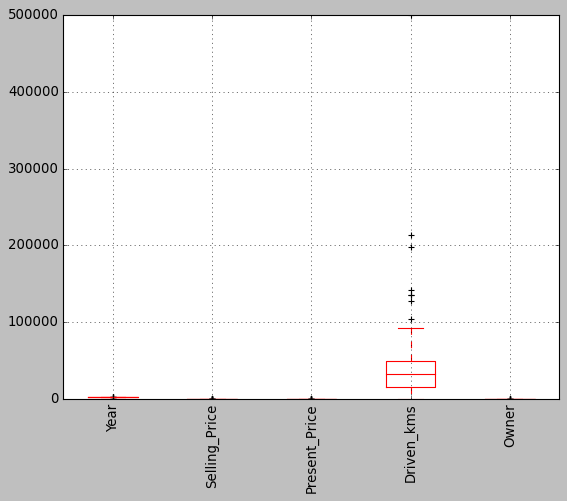

In [11]:
# checking for outliers 
plt.style.use('classic')
df.boxplot(color='red')
plt.xticks(rotation=90)
plt.show()

### Univariate analysis

In [12]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

##### analysing numerical columns 'Selling_Price', 'Present_Price', 'Driven_kms'

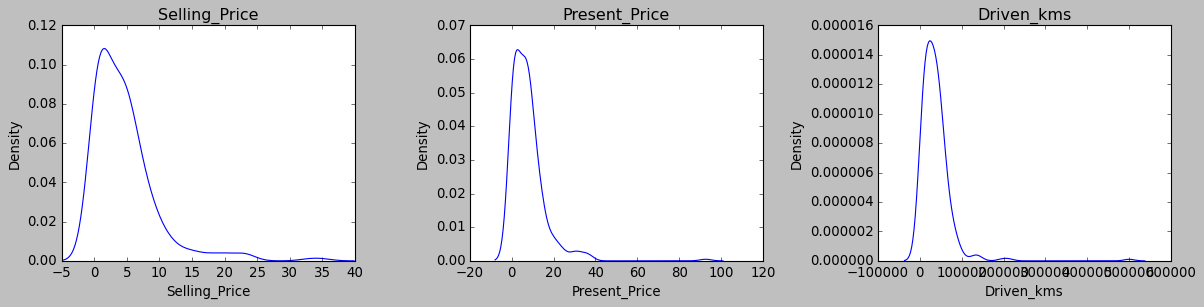

In [27]:
plt.style.use('classic')
plt.figure(figsize=(20,4))
re=1
for i in ['Selling_Price', 'Present_Price', 'Driven_kms']:
    plt.subplot(1,4,re)
    sns.kdeplot(x=df[i], color='blue')
    plt.title(i)
    re+=1
    
plt.tight_layout()
plt.show()

 all the three columns are skwewd. 

##### analysing numerical columns ''Year','Transmission', 'Owner','Fuel_Type', 'Selling_type'

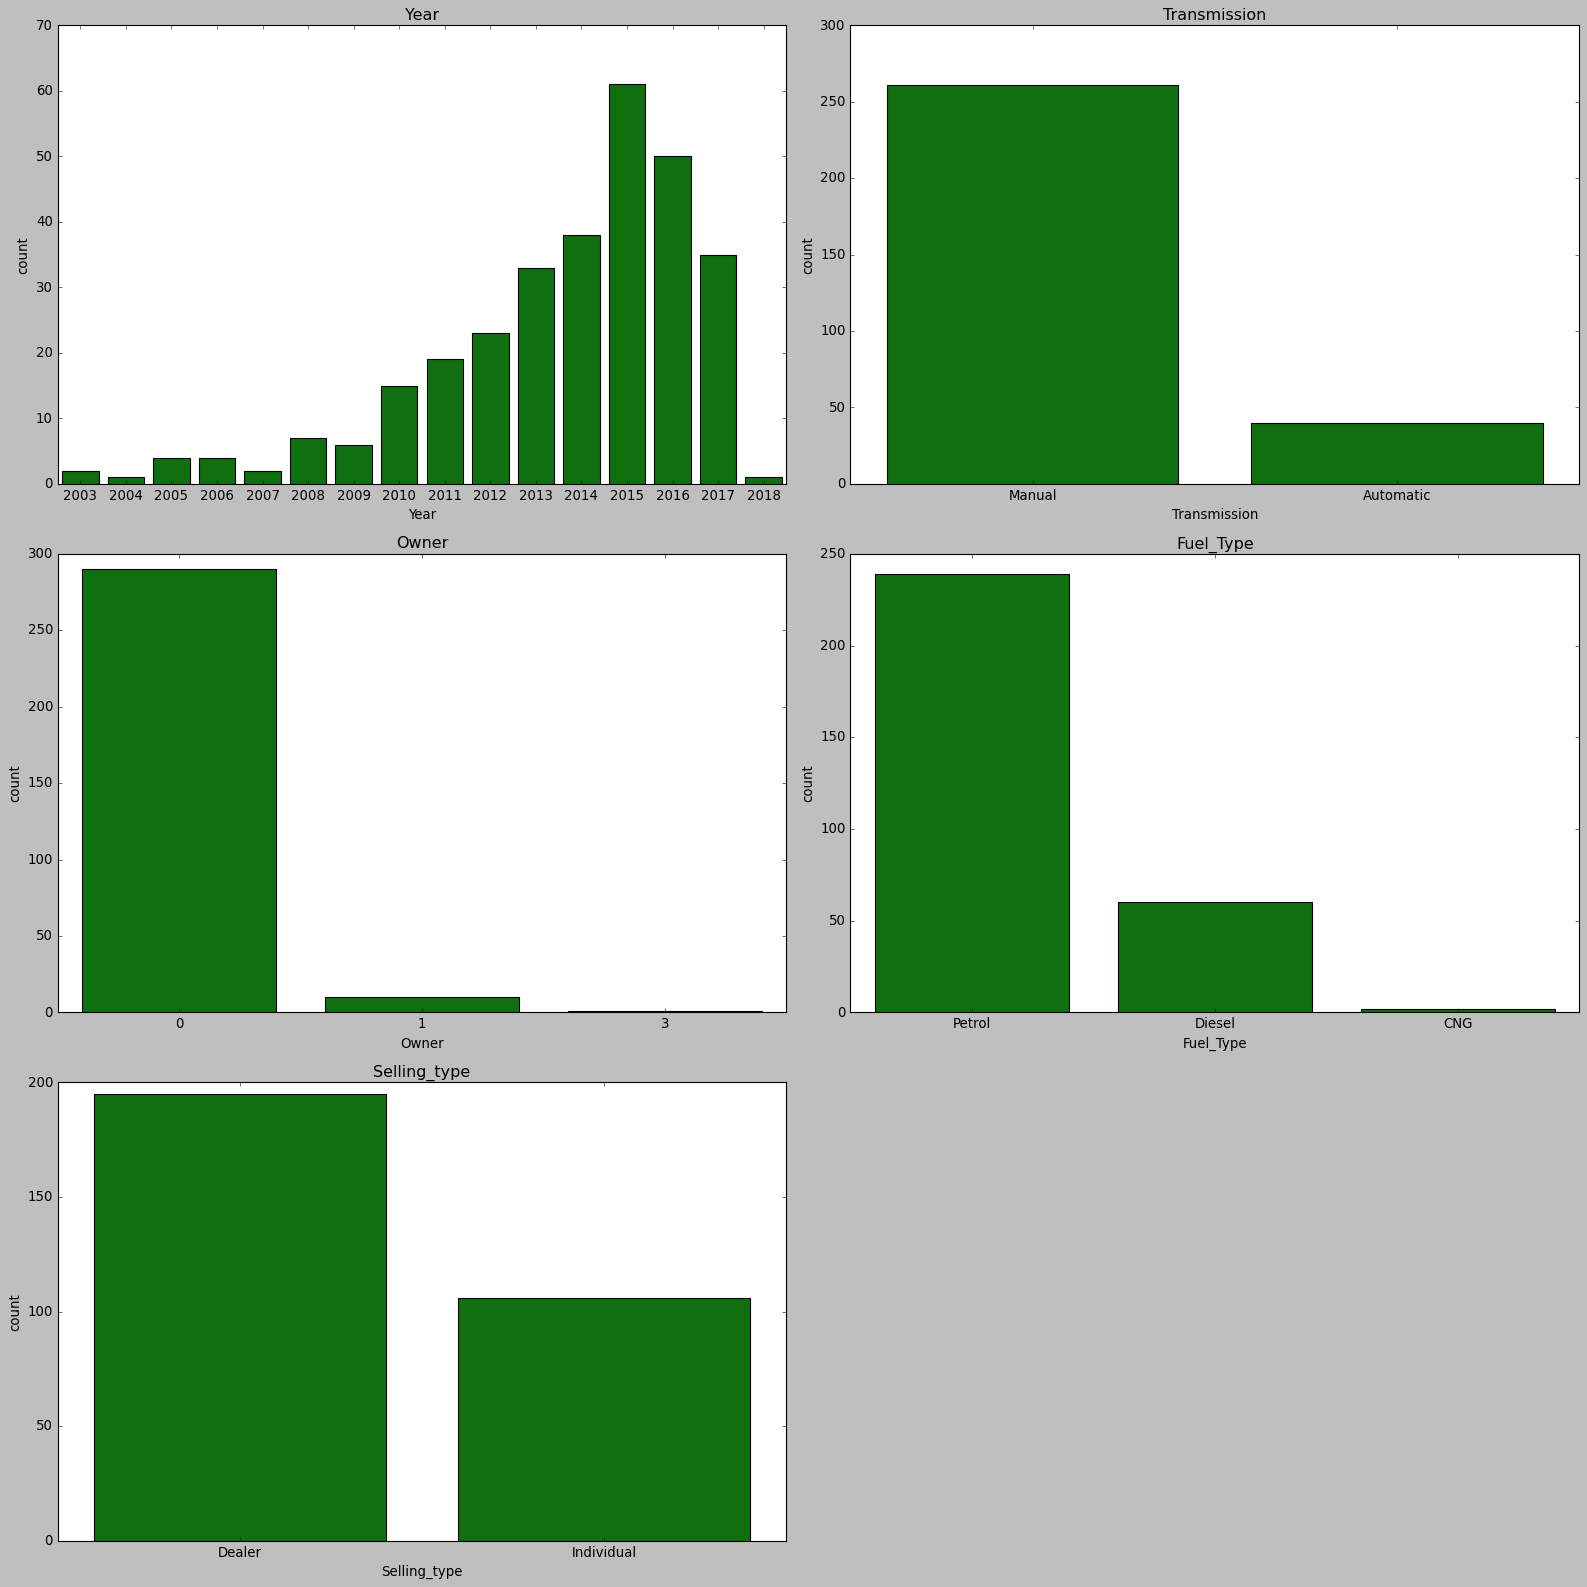

In [13]:
plt.figure(figsize=(20,20))
re=1
for i in ['Year','Transmission', 'Owner','Fuel_Type', 'Selling_type']:
    plt.subplot(3,2,re)
    sns.countplot(x=df[i], color='green')
    plt.title(i)
    re+=1
    
plt.tight_layout()
plt.show()

* The data from 2015 is mor ethan 50  while 2018 has only one entry. 

* The entries with zero owner  is high.

* The data has  more counts in dealer type selling type.

*  the count of manual transmission cars are very high compared to automatic cars. 

*  the data has more of petrol powered car than diesel or CNG. 

### Bivariate analysis

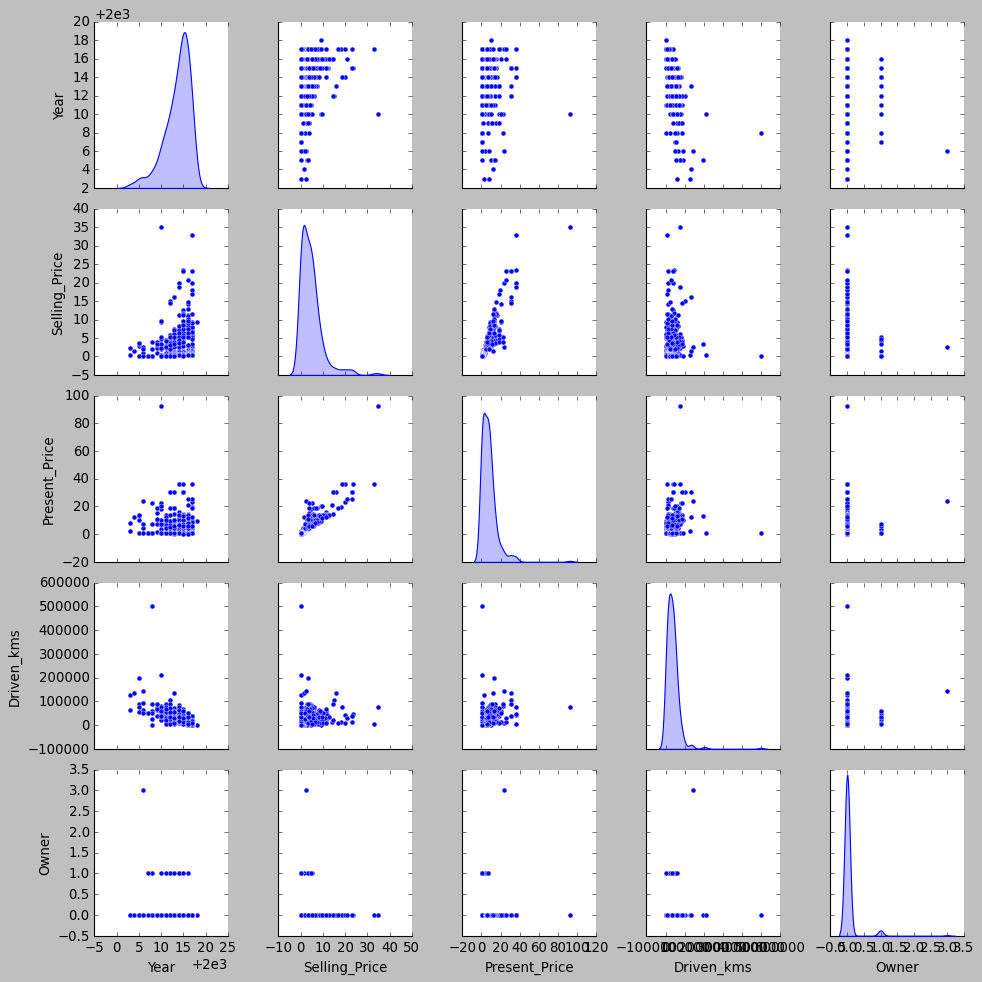

In [14]:
plt.style.use('classic')
sns.pairplot(df, diag_kind='kde')
plt.show()

* There is a relationship between year and owner. 

*  there could be a relationship between selling price and year.

*  there could be a relationship between selling price and present price. 

*  their could be a relationship between driven kilometres and filling rice. 

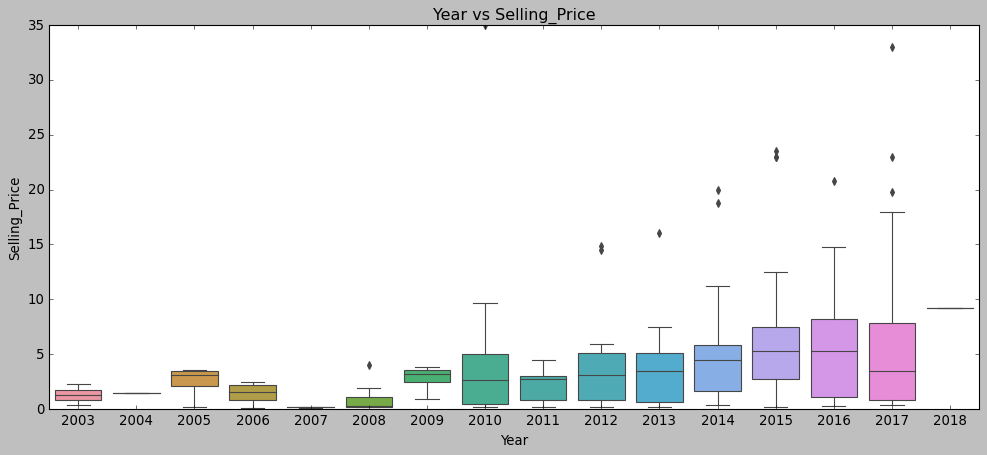

In [15]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df,x=df['Year'],y='Selling_Price')
plt.title('Year vs Selling_Price')
plt.show()

The selling price has outliers from 2012 to 2017 and in 2002. 

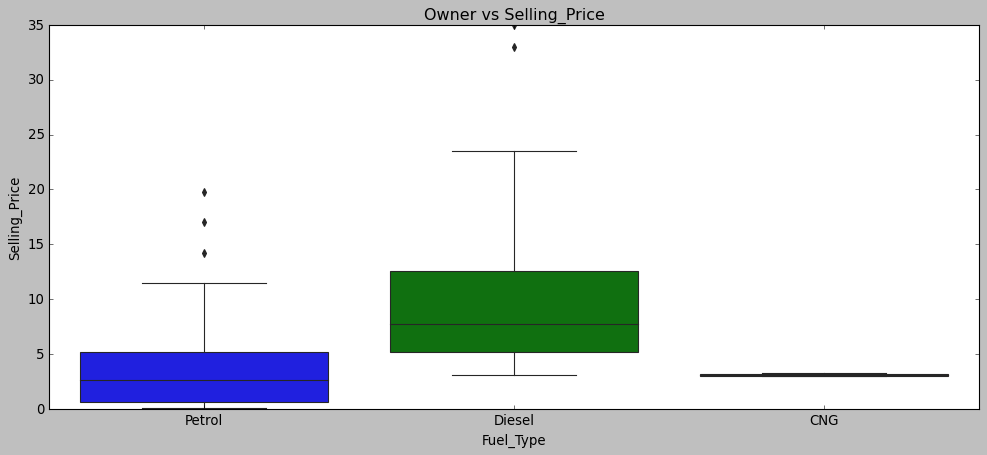

In [16]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df,x=df['Fuel_Type'],y='Selling_Price')
plt.title('Owner vs Selling_Price')
plt.show()

Petrol selling price has outliers 

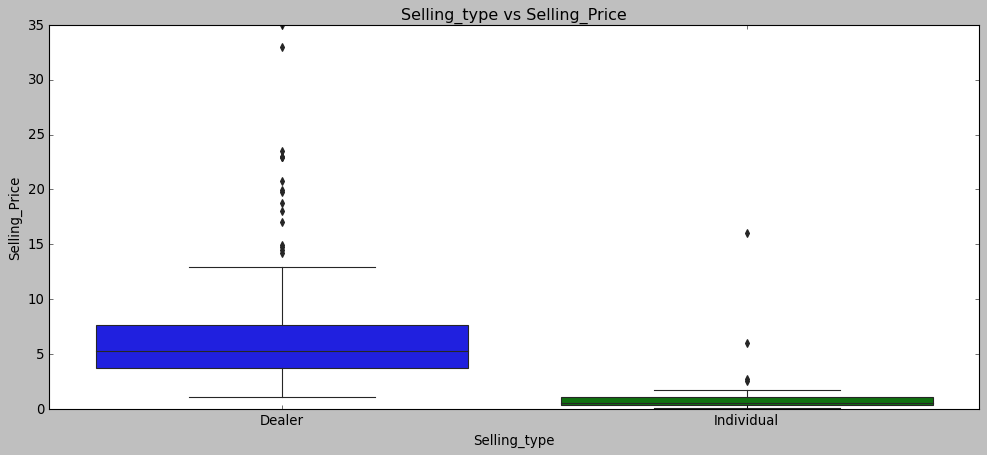

In [17]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df,x=df['Selling_type'],y='Selling_Price')
plt.title('Selling_type vs Selling_Price')
plt.show()

Dealer type and individual type both has outliers in selling price. 

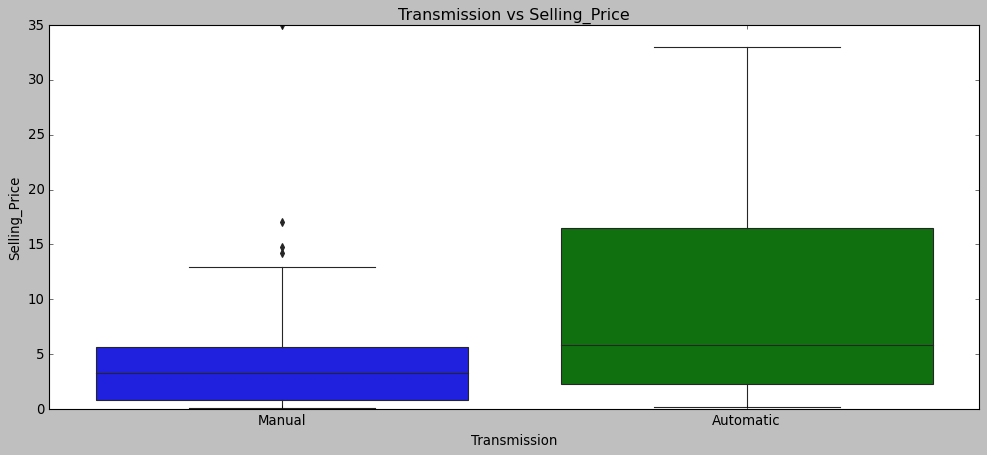

In [18]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df,x=df['Transmission'],y='Selling_Price')
plt.title('Transmission vs Selling_Price')
plt.show()

manual type transmission has outliers in selling price 

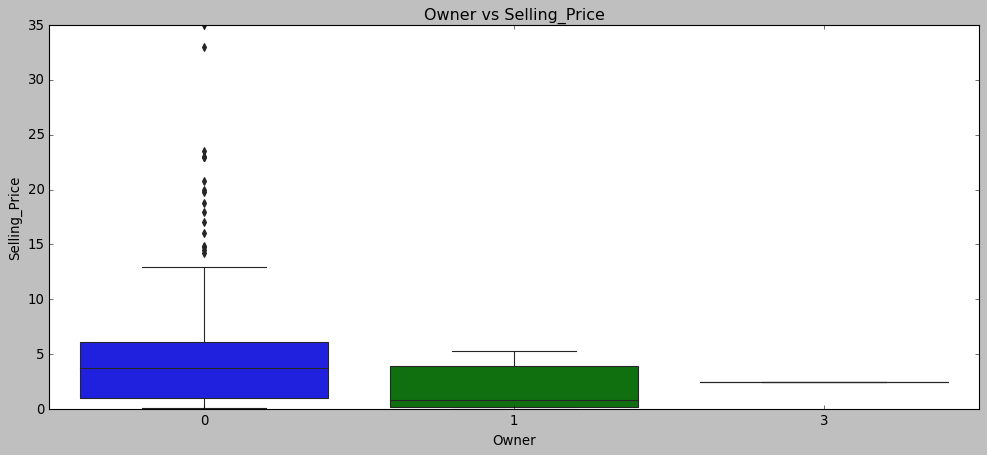

In [19]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df,x=df['Owner'],y='Selling_Price')
plt.title('Owner vs Selling_Price')
plt.show()

only 0 owner type has outliers in selling price. 

In [20]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

### Evaluating car names relation with price

In [21]:
df['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [22]:
a=df['Car_Name'].value_counts()
high_cars=a[a>1]
high_cars.index

Index(['city', 'corolla altis', 'verna', 'fortuner', 'brio', 'ciaz', 'innova',
       'i20', 'grand i10', 'jazz', 'amaze', 'Royal Enfield Classic 350',
       'ertiga', 'eon', 'sx4', 'alto k10', 'i10', 'swift', 'Bajaj Pulsar 150',
       'Royal Enfield Thunder 350', 'ritz', 'wagon r', 'etios liva', 'dzire',
       'xcent', 'etios cross', 'Royal Enfield Thunder 500',
       'TVS Apache RTR 160', 'Yamaha FZ S V 2.0', 'creta',
       'Honda CB Hornet 160R', 'etios g', 'Bajaj Avenger 220',
       'Bajaj Pulsar NS 200', 'Bajaj Discover 125', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 'Yamaha FZ  v 2.0', 'Honda Activa 4G',
       'Hero Extreme', 'Honda CB twister', 'Hero Splender iSmart', 'Activa 3g',
       'Hero Passion Pro', 'Honda CB Shine', 'Bajaj Avenger 220 dtsi',
       'Honda CBR 150', 'elantra', 'Royal Enfield Classic 500', 'KTM RC200',
       'Honda Karizma'],
      dtype='object')

In [4]:
df.groupby('Car_Name')[['Selling_Price']].mean().sort_values(by='Selling_Price', ascending=False)

,Selling_Price
Car_Name,
land cruiser,35.000000
fortuner,18.685455
innova,12.777778
creta,11.800000
elantra,11.600000
...,...
Hero CBZ Xtreme,0.200000
Hero Hunk,0.200000
Hero Super Splendor,0.200000


land cruiser has the average high selling price. 

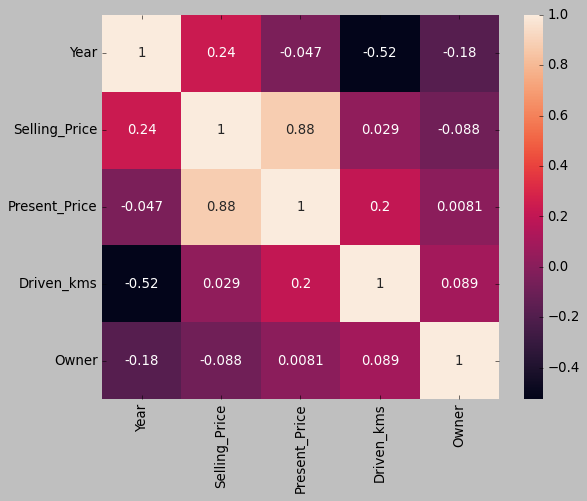

In [24]:
sns.heatmap(df.corr(), annot=True)
plt.show()

From the heat map the following conclusions can be driven, 

*  there is a negative correlation between year and driven kilometres

*  there is a positive correlation between selling price and present price. 

### CONCLUSIONS FROM EDA

* we have data from 2003 to 2018.
* there is a negative correlation between year and driven kilometres
* there is a positive correlation between selling price and present price.
* Dealer type and individual type both has outliers in selling price.
* Petrol selling price has outliers 
* The data from 2015 is mor ethan 50 while 2018 has only one entry.
* The entries with zero owner is high.
* The data has more counts in dealer type selling type.
* the count of manual transmission cars are very high compared to automatic cars.
* the data has more of petrol powered car than diesel or CNG.


##### changes that can be made are 
    * car names with only two entries can be bucketed into others categoty. 

### data preprocessing 

In [5]:
a=df['Car_Name'].value_counts()
cars=a[a<=2].index
cars

Index(['Bajaj Discover 125', 'Bajaj Pulsar 220 F', 'TVS Apache RTR 180',
       'Yamaha FZ  v 2.0', 'Honda Activa 4G', 'Hero Extreme',
       'Honda CB twister', 'Hero Splender iSmart', 'Activa 3g',
       'Hero Passion Pro', 'Honda CB Shine', 'Bajaj Avenger 220 dtsi',
       'Honda CBR 150', 'elantra', 'Royal Enfield Classic 500', 'KTM RC200',
       'Honda Karizma', 'Bajaj  ct 100', 'Hero  Ignitor Disc', 'TVS Jupyter',
       'Hero Honda Passion Pro', 'Hero Splender Plus', 'vitara brezza',
       'Bajaj Discover 100', 'Suzuki Access 125', 's cross', 'alto 800',
       'baleno', 'TVS Wego', 'Hero  CBZ Xtreme', 'Hero Glamour', 'ignis',
       'Hero Super Splendor', '800', 'Hero Hunk', 'Honda Activa 125',
       'corolla', 'Hero Honda CBZ extreme', 'Yamaha FZ 16', 'camry',
       'land cruiser', 'UM Renegade Mojave', 'Bajaj Dominar 400', 'KTM RC390',
       'Hyosung GT250R', 'KTM 390 Duke ', 'Mahindra Mojo XT300',
       'Bajaj Pulsar RS200', 'Royal Enfield Bullet 350', 'Bajaj Avenger 1

In [6]:
for i in cars:
    df['Car_Name'] = df['Car_Name'].replace(i,'others')


### label encoding the columns

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Car_Name'] = le.fit_transform(df['Car_Name'])
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Selling_type'] = le.fit_transform(df['Selling_type'])
df['Transmission'] = le.fit_transform(df['Transmission'])

In [8]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,29,2014,3.35,5.59,27000,2,0,1,0
1,31,2013,4.75,9.54,43000,1,0,1,0
2,12,2017,7.25,9.85,6900,2,0,1,0
3,33,2011,2.85,4.15,5200,2,0,1,0
4,30,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,13,2016,9.50,11.60,33988,1,0,1,0
297,11,2015,4.00,5.90,60000,2,0,1,0
298,13,2009,3.35,11.00,87934,2,0,1,0
299,13,2017,11.50,12.50,9000,1,0,1,0


### split the data

In [9]:
from sklearn.model_selection import train_test_split

X=df.drop('Selling_Price', axis=1)
y=df['Selling_Price']

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=10, shuffle=True)

### scale the numerical columns 

In [12]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
cl= ['Year','Present_Price', 'Driven_kms']
x_train[cl] = mm.fit_transform(x_train[cl])
x_test[cl]=mm.transform(x_test[cl])

## Model Building 

In [13]:
# import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer,StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut,GridSearchCV ,RandomizedSearchCV
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [14]:
Regressors={'LR':LinearRegression(),
    'knnR':KNeighborsRegressor(),
              'decisiontreeR':DecisionTreeRegressor(),
              'randomforestR':RandomForestRegressor(),
              'gradientboostR':GradientBoostingRegressor(),
             "xgboostR":XGBRegressor()}

model_report=pd.DataFrame(columns=['model_name','r2 train','mse train','mse test']) #,#'roc'

for Regressor, Regressor_name in list(zip(Regressors.values(), Regressors.keys())):
    Regressor.fit(x_train,y_train)
    y_pred_train=Regressor.predict(x_train)
    y_pred_test=Regressor.predict(x_test)
    print('fitting the model ....',Regressor_name)
    t=pd.Series({
        'model_name':Regressor_name, 
        'r2 train':r2_score(y_train, y_pred_train),
        'mse train':mean_squared_error(y_train, y_pred_train),
        'mse test':mean_squared_error(y_test, y_pred_test)
    })
    model_report=model_report.append(t,ignore_index=True)
    

fitting the model .... LR
fitting the model .... knnR
fitting the model .... decisiontreeR
fitting the model .... randomforestR
fitting the model .... gradientboostR
fitting the model .... xgboostR


In [15]:
model_report

,model_name,r2 train,mse train,mse test
0,LR,0.884072,2.787046,5.068282
1,knnR,0.807263,4.633634,4.007949
2,decisiontreeR,1.000000,0.000000,2.812910
3,randomforestR,0.981450,0.445957,2.678047
4,gradientboostR,0.995845,0.099894,1.801859
5,xgboostR,0.999998,0.000056,1.873418


The decision tree model shows signs of overfitting and 
all models needs improvement. 


## RIDGE

In [16]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()


ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

Best parameters for Ridge Regression:  {'alpha': 0.1} 



In [17]:
# use Ridge() to perform ridge regression

ridge_model = Ridge(alpha = 0.1, max_iter = 500)

# fit the model on train set
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.1, max_iter=500)

In [18]:
# get predicted values

ypred_train_ridge = ridge_model.predict(x_train)
ypred_test_ridge = ridge_model.predict(x_test)

In [19]:
t=pd.Series({
        'model_name':'ridge lr', 
        'r2 train':r2_score(y_train, ypred_train_ridge),
        'mse train':mean_squared_error(y_train, ypred_train_ridge),
        'mse test':mean_squared_error(y_test, ypred_test_ridge )
    })
model_report=model_report.append(t,ignore_index=True)
    

### lasso

In [20]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the LASSO regression model
lasso = Lasso()


lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')


Best parameters for Lasso Regression:  {'alpha': 0.01} 



In [21]:
lasso_model = Lasso(alpha = 0.01, max_iter = 500)

In [22]:
# fit the model 
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.01, max_iter=500)

In [23]:
# get the predicted values
ypred_train_LASSO = lasso_model.predict(x_train)
ypred_test_LASSO = lasso_model.predict(x_test)

In [24]:
t=pd.Series({
        'model_name':'lasso lr', 
        'r2 train':r2_score(y_train, ypred_train_ridge),
        'mse train':mean_squared_error(y_train, ypred_train_ridge),
        'mse test':mean_squared_error(y_test, ypred_test_ridge )
    })
model_report=model_report.append(t,ignore_index=True)

### enet

In [25]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()


enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')



Best parameters for Elastic Net Regression:  {'alpha': 0.001, 'l1_ratio': 0.2} 



In [26]:
elasticnet_model = ElasticNet(alpha = 0.001, l1_ratio=0.2, max_iter = 500)

In [27]:
# fit the model 
elasticnet_model.fit(x_train, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.2, max_iter=500)

In [28]:
# get the predicted values 
ypred_train_ENET = elasticnet_model.predict(x_train)
ypred_test_ENET = elasticnet_model.predict(x_test)

In [29]:
t=pd.Series({
        'model_name':'elasticnet lr', 
        'r2 train':r2_score(y_train, ypred_train_ENET ),
        'mse train':mean_squared_error(y_train, ypred_train_ENET ),
        'mse test':mean_squared_error(y_test,ypred_test_ENET)
    })
model_report=model_report.append(t,ignore_index=True)

### sfs forward and linear regression 

In [30]:
from sklearn.model_selection import train_test_split

X=df.drop('Selling_Price', axis=1)
y=df['Selling_Price']

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=10, shuffle=True)

In [32]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((240, 8), (61, 8), (240,), (61,))

In [33]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
cl= ['Year','Present_Price', 'Driven_kms']
x_train[cl] = mm.fit_transform(x_train[cl])
x_test[cl]=mm.transform(x_test[cl])

In [34]:
lr= LinearRegression()

lr_forward = sfs(estimator=lr, k_features ='best', forward=True,
                     verbose=2, scoring='r2')


sfs_forward = lr_forward.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2023-12-03 12:04:08] Features: 1/8 -- score: 0.7300124024992707[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2023-12-03 12:04:08] Features: 2/8 -- score: 0.8197428585916228[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2023-12-03 12:04:09] Features: 3/8 -- score: 0.834954047011699[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

In [35]:
sfs_forward.k_feature_names_

('Year', 'Present_Price', 'Fuel_Type', 'Selling_type', 'Transmission')

In [36]:
xtrain=x_train.loc[:,sfs_forward.k_feature_names_]
xtest=x_test.loc[:,sfs_forward.k_feature_names_]

In [37]:
lr_model_sfs = lr.fit(xtrain,y_train)
ypred_train_lr_sfs = lr_model_sfs.predict(xtrain)
ypred_test_lr_sfs = lr_model_sfs.predict(xtest)

In [38]:
t=pd.Series({
        'model_name':'sfs_fr lr', 
        'r2 train':r2_score(y_train, ypred_train_lr_sfs ),
        'mse train':mean_squared_error(y_train, ypred_train_lr_sfs ),
        'mse test':mean_squared_error(y_test, ypred_test_lr_sfs  )
    })
model_report=model_report.append(t,ignore_index=True)

In [39]:
model_report

,model_name,r2 train,mse train,mse test
0,LR,0.884072,2.787046,5.068282
1,knnR,0.807263,4.633634,4.007949
2,decisiontreeR,1.000000,0.000000,2.812910
3,randomforestR,0.981450,0.445957,2.678047
4,gradientboostR,0.995845,0.099894,1.801859
5,xgboostR,0.999998,0.000056,1.873418
6,ridge lr,0.882146,2.833359,5.082249
7,lasso lr,0.882146,2.833359,5.082249
8,elasticnet lr,0.877775,2.938440,5.155591
9,sfs_fr lr,0.879065,2.907436,4.717534


### sfs backward with linear regression

In [40]:
from sklearn.model_selection import train_test_split

X=df.drop('Selling_Price', axis=1)
y=df['Selling_Price']

In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=10, shuffle=True)

In [42]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
cl= ['Year','Present_Price', 'Driven_kms']
x_train[cl] = mm.fit_transform(x_train[cl])
x_test[cl]=mm.transform(x_test[cl])

In [43]:
lr= LinearRegression()

lr_backward = sfs(estimator=lr, k_features ='best', forward=False,
                     verbose=2, scoring='r2')


sfs_backward = lr_backward.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2023-12-03 12:05:08] Features: 7/1 -- score: 0.8379777221403637[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2023-12-03 12:05:08] Features: 6/1 -- score: 0.8429208201176358[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2023-12-03 12:05:08] Features: 5/1 -- score: 0.8446755131829404[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [44]:
sfs_backward.k_feature_names_ 

('Year', 'Present_Price', 'Fuel_Type', 'Selling_type', 'Transmission')

In [45]:
xtrain=x_train.loc[:,sfs_forward.k_feature_names_]
xtest=x_test.loc[:,sfs_forward.k_feature_names_]

In [47]:
lr_model_sfs_bc = lr.fit(xtrain,y_train)
ypred_train_lr_sfs_bc = lr_model_sfs_bc.predict(xtrain)
ypred_test_lr_sfs_bc= lr_model_sfs_bc.predict(xtest)

In [49]:
t=pd.Series({
        'model_name':'sfs_bc lr', 
        'r2 train':r2_score(y_train, ypred_train_lr_sfs_bc ),
        'mse train':mean_squared_error(y_train, ypred_train_lr_sfs_bc ),
        'mse test':mean_squared_error(y_test, ypred_test_lr_sfs_bc  )
    })
model_report=model_report.append(t,ignore_index=True)

In [50]:
model_report

,model_name,r2 train,mse train,mse test
0,LR,0.884072,2.787046,5.068282
1,knnR,0.807263,4.633634,4.007949
2,decisiontreeR,1.000000,0.000000,2.812910
3,randomforestR,0.981450,0.445957,2.678047
4,gradientboostR,0.995845,0.099894,1.801859
5,xgboostR,0.999998,0.000056,1.873418
6,ridge lr,0.882146,2.833359,5.082249
7,lasso lr,0.882146,2.833359,5.082249
8,elasticnet lr,0.877775,2.938440,5.155591
9,sfs_fr lr,0.879065,2.907436,4.717534


In [ ]:
Gradient Boosting Regression can be considered the best model. 

## Gradient Boosting Regression - with all features

In [82]:
from sklearn.model_selection import train_test_split

X=df.drop('Selling_Price', axis=1)
y=df['Selling_Price']

In [83]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=10, shuffle=True)

In [84]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
cl= ['Year','Present_Price', 'Driven_kms']
x_train[cl] = mm.fit_transform(x_train[cl])
x_test[cl]=mm.transform(x_test[cl])

In [85]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred_train=gbr.predict(x_train)
y_pred_test=gbr.predict(x_test)

In [88]:
print('r2 train=',r2_score(y_train,y_pred_train), '\n\n',
'mse train=', mean_squared_error(y_train,y_pred_train), '\n\n',
'mse test=', mean_squared_error(y_test,y_pred_test))

r2 train= 0.9958448891637729 

 mse train= 0.09989405024713811 

 mse test= 1.7771695803783618


# Gradient Boosting Regression - with sfs backward features¶

In [170]:
gbr=GradientBoostingRegressor()

lr_backward = sfs(estimator=gbr, k_features ='best', forward=False,
                     verbose=2, scoring='r2')


sfs_backward = lr_backward.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.1s finished

[2023-12-03 13:13:50] Features: 8/1 -- score: 0.8823837840583174[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.6s finished

[2023-12-03 13:13:54] Features: 7/1 -- score: 0.8822475009670875[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.1s finished

[2023-12-03 13:13:57] Features: 6/1 -- score: 0.8825038302450696[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [171]:
sfs_backward.k_feature_names_ 

('Year',
 'Present_Price',
 'Fuel_Type_Diesel',
 'Selling_type_Dealer',
 'Selling_type_Individual',
 'Transmission_Automatic')

In [174]:
from sklearn.model_selection import train_test_split

X=x.loc[:,['Year',
 'Present_Price',
 'Fuel_Type_Diesel',
 'Selling_type_Dealer',
 'Selling_type_Individual',
 'Transmission_Automatic']]
y=df['Selling_Price']

In [310]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=36)

In [311]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
cl= ['Year','Present_Price',]
x_train[cl] = mm.fit_transform(x_train[cl])
x_test[cl]=mm.transform(x_test[cl])

In [268]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred_train=gbr.predict(x_train)
y_pred_test=gbr.predict(x_test)

In [269]:
print('r2 train=',r2_score(y_train,y_pred_train), '\n\n',
'mse train=', mean_squared_error(y_train,y_pred_train), '\n\n',
'mse test=', mean_squared_error(y_test,y_pred_test))

r2 train= 0.9950944911706967 

 mse train= 0.13374732910854903 

 mse test= 0.47442562431695745


In [96]:
# Define the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Hyperparameter tuning using GridSearchCV
param_grid = {'n_estimators': [5,7,10,13,15,20,50,25,75,100,125,150,200],
    'learning_rate': [0.01, 0.1,.003,.03,0.4,0.5,0.6,0.7,0.8,0.9,.3,0.2,1,2],
    'max_depth': [3,4, 5,7,9]}

grid_search = GridSearchCV(gb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
best_gb_model = grid_search.best_estimator_
best_gb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_train=gbr.predict(x_train)
y_pred_test=gbr.predict(x_test)

print('r2 train:',r2_score(y_train,y_pred_train), 
       'mse train:', mean_squared_error(y_train,y_pred_train),
    "mse test:", mean_squared_error(y_test, y_pred_test))

Best Hyperparameters: {'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 100}
r2 train: 0.9958448891637729 mse train: 0.09989405024713811 mse test: 1.7771695803783618


In [314]:
gbr=GradientBoostingRegressor(learning_rate= 0.6, max_depth= 3, n_estimators= 100)
gbr.fit(x_train,y_train)
y_pred_train=gbr.predict(x_train)
y_pred_test=gbr.predict(x_test)

In [315]:
print('r2 train=',r2_score(y_train,y_pred_train), '\n\n',
'mse train=', mean_squared_error(y_train,y_pred_train), '\n\n',
'mse test=', mean_squared_error(y_test,y_pred_test))

r2 train= 0.9987087805195985 

 mse train= 0.035204738755133316 

 mse test= 0.54750067803678


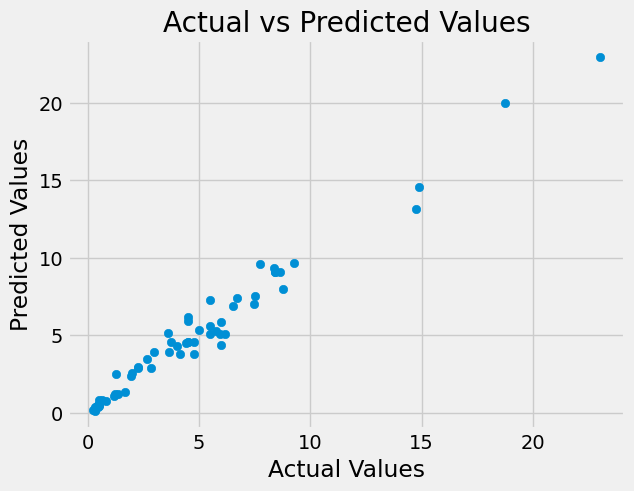

In [318]:

# Check for anomalies in the test set
# Visualize the predictions and actual values to identify patterns
plt.scatter(y_test,y_pred_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

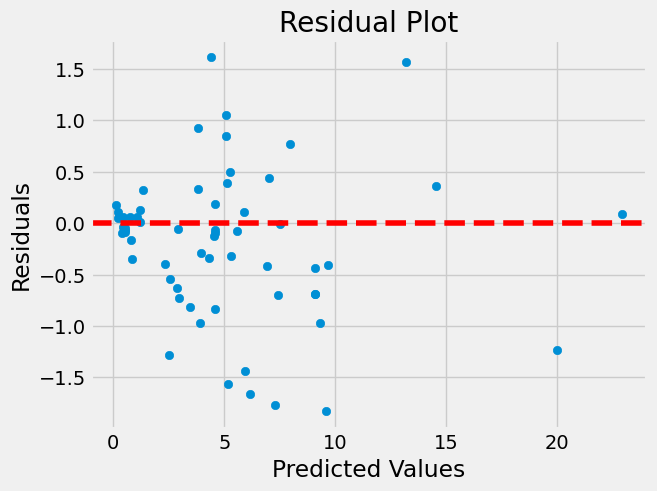

In [319]:
# Calculate residuals
residuals = y_test - y_pred_test

# Plot residuals
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# approach 2 - with more combining of catgeories in the columns


In [403]:
df=data.copy()

In [404]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [405]:
df.groupby('Fuel_Type')['Selling_Price'].mean()

Fuel_Type
CNG        3.100000
Diesel    10.278500
Petrol     3.264184
Name: Selling_Price, dtype: float64

In [406]:
# from the mean of selling price petrol and CNG can be combined. 
df['Fuel_Type']=df['Fuel_Type'].replace('CNG','Petrol')


In [407]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [408]:
df.groupby('Owner')['Selling_Price'].mean()

Owner
0    4.761552
1    1.970000
3    2.500000
Name: Selling_Price, dtype: float64

In [409]:
# from the mean of selling price one and three can be combined. 
df['Owner']=df['Owner'].replace(3,1)

In [410]:
df['Owner'].value_counts()

0    290
1     11
Name: Owner, dtype: int64

In [411]:
df['Year'].value_counts().index

Int64Index([2015, 2016, 2014, 2017, 2013, 2012, 2011, 2010, 2008, 2009, 2006,
            2005, 2003, 2007, 2018, 2004],
           dtype='int64')

In [412]:
def year_sales(x):
    for x in [2015, 2016, 2014, 2017, 2013, 2012, 2011, 2010]:
        return 'high sales years'
    else:
        return 'low sales years'

# Apply the function to each element in the 'Year' column
df['Year_Category'] = df['Year'].apply(year_sales)

In [413]:
def year_category(x):
    if x < 2010:
        return 'before 2010'
    else:
        return 'after 2010'

# Apply the function to each element in the 'Year' column
df['Year_Category'] = df['Year'].apply(year_category)


In [414]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Year_Category
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,after 2010
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,after 2010
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,after 2010
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,after 2010
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,after 2010
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,after 2010
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,after 2010
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,before 2010
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,after 2010


In [415]:
df1=df.drop(['Year'], axis=1)

In [420]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df1['Car_Name'] = le.fit_transform(df1['Car_Name'])

In [421]:
df2=pd.get_dummies(df1)

In [422]:
df2

,Car_Name,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual,Year_Category_after 2010,Year_Category_before 2010
0,90,3.35,5.59,27000,0,0,1,1,0,0,1,1,0
1,93,4.75,9.54,43000,0,1,0,1,0,0,1,1,0
2,68,7.25,9.85,6900,0,0,1,1,0,0,1,1,0
3,96,2.85,4.15,5200,0,0,1,1,0,0,1,1,0
4,92,4.60,6.87,42450,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,69,9.50,11.60,33988,0,1,0,1,0,0,1,1,0
297,66,4.00,5.90,60000,0,0,1,1,0,0,1,1,0
298,69,3.35,11.00,87934,0,0,1,1,0,0,1,0,1
299,69,11.50,12.50,9000,0,1,0,1,0,0,1,1,0


In [423]:
X=df2.drop('Selling_Price', axis=1)
y=df2['Selling_Price']

In [424]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=36)

In [425]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
cl= ['Present_Price','Driven_kms']
x_train[cl] = mm.fit_transform(x_train[cl])
x_test[cl]=mm.transform(x_test[cl])

In [426]:
Regressors={'LR':LinearRegression(),
    'knnR':KNeighborsRegressor(),
              'decisiontreeR':DecisionTreeRegressor(),
              'randomforestR':RandomForestRegressor(),
              'gradientboostR':GradientBoostingRegressor(),
             "xgboostR":XGBRegressor()}

model_report=pd.DataFrame(columns=['model_name','r2 train','mse train','mse test']) #,#'roc'

for Regressor, Regressor_name in list(zip(Regressors.values(), Regressors.keys())):
    Regressor.fit(x_train,y_train)
    y_pred_train=Regressor.predict(x_train)
    y_pred_test=Regressor.predict(x_test)
    print('fitting the model ....',Regressor_name)
    t=pd.Series({
        'model_name':Regressor_name, 
        'r2 train':r2_score(y_train, y_pred_train),
        'mse train':mean_squared_error(y_train, y_pred_train),
        'mse test':mean_squared_error(y_test, y_pred_test)
    })
    model_report=model_report.append(t,ignore_index=True)
    

fitting the model .... LR
fitting the model .... knnR
fitting the model .... decisiontreeR
fitting the model .... randomforestR
fitting the model .... gradientboostR
fitting the model .... xgboostR


In [428]:
model_report

,model_name,r2 train,mse train,mse test
0,LR,0.851486,4.049183,2.865465
1,knnR,0.812473,5.112876,4.955840
2,decisiontreeR,0.999839,0.004385,1.167623
3,randomforestR,0.982345,0.481353,1.400709
4,gradientboostR,0.992694,0.199203,1.242717
5,xgboostR,0.999830,0.004628,1.206743


In [429]:
gbr=GradientBoostingRegressor()

lr_backward = sfs(estimator=gbr, k_features ='best', forward=False,
                     verbose=2, scoring='r2')


sfs_backward = lr_backward.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    7.3s finished

[2023-12-03 14:31:24] Features: 11/1 -- score: 0.8716164225227867[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    6.4s finished

[2023-12-03 14:31:31] Features: 10/1 -- score: 0.8718848542060733[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.8s finished

[2023-12-03 14:31:37] Features: 9/1 -- score: 0.8722983342163578[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [430]:
sfs_backward.k_feature_names_ 

('Present_Price',
 'Driven_kms',
 'Fuel_Type_Petrol',
 'Year_Category_before 2010')

In [431]:
X=df2.drop('Selling_Price', axis=1)
y=df2['Selling_Price']

In [432]:
from sklearn.model_selection import train_test_split

X=X.loc[:,['Present_Price',
 'Driven_kms',
 'Fuel_Type_Petrol',
 'Year_Category_before 2010']]
y=df['Selling_Price']

In [433]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=36)

In [434]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
cl= ['Present_Price','Driven_kms']
x_train[cl] = mm.fit_transform(x_train[cl])
x_test[cl]=mm.transform(x_test[cl])

In [435]:
Regressors={'LR':LinearRegression(),
    'knnR':KNeighborsRegressor(),
              'decisiontreeR':DecisionTreeRegressor(),
              'randomforestR':RandomForestRegressor(),
              'gradientboostR':GradientBoostingRegressor(),
             "xgboostR":XGBRegressor()}

model_report=pd.DataFrame(columns=['model_name','r2 train','mse train','mse test']) #,#'roc'

for Regressor, Regressor_name in list(zip(Regressors.values(), Regressors.keys())):
    Regressor.fit(x_train,y_train)
    y_pred_train=Regressor.predict(x_train)
    y_pred_test=Regressor.predict(x_test)
    print('fitting the model ....',Regressor_name)
    t=pd.Series({
        'model_name':Regressor_name, 
        'r2 train':r2_score(y_train, y_pred_train),
        'mse train':mean_squared_error(y_train, y_pred_train),
        'mse test':mean_squared_error(y_test, y_pred_test)
    })
    model_report=model_report.append(t,ignore_index=True)
    

fitting the model .... LR
fitting the model .... knnR
fitting the model .... decisiontreeR
fitting the model .... randomforestR
fitting the model .... gradientboostR
fitting the model .... xgboostR


In [436]:
 model_report

,model_name,r2 train,mse train,mse test
0,LR,0.826618,4.727214,2.727477
1,knnR,0.933988,1.799807,1.721606
2,decisiontreeR,0.999839,0.004385,3.036569
3,randomforestR,0.983023,0.462885,1.578370
4,gradientboostR,0.991566,0.229945,1.304185
5,xgboostR,0.999817,0.004982,1.366156


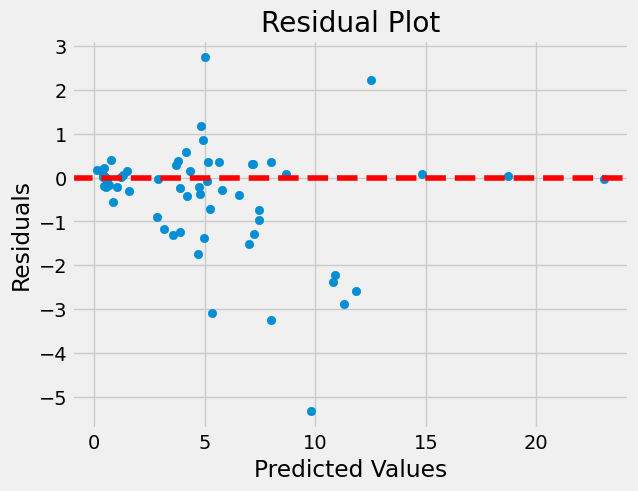

In [439]:
# Calculate residuals
residuals = y_test - y_pred_test

# Plot residuals
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Conclusion 

In any of the above approaches, most of the models performs better with train a=but not that much with test. 